In [7]:
# custom data generation


# our task here is ----------------------------------------------------------------
        #Identify the best-fit probability distribution for daily sales (e.g., normal, Poisson).
		#2. Estimate the parameters of the chosen distribution.
		#3. Calculate probabilities (e.g., "What’s the probability of selling more than 200 units in a day?").

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Parameters (adjust as needed)
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 12, 31)
num_stores = 5
categories = {"Electronics": (50, 20), "Clothing": (30, 15), "Home Goods": (20, 10), "Toys": (40, 18)}
trend_factor = 1.005  # Slight upward trend
seasonal_multipliers = {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.2}
holidays = {"Christmas": datetime(2023, 12, 25), "Black Friday": datetime(2023, 11, 29), "Christmas": datetime(2024, 12, 25), "Black Friday": datetime(2024, 11, 29)}
holiday_multipliers = {"Christmas": {"Electronics": 1.5, "Toys": 2.0}, "Black Friday": 1.3}
correlation_promotion_holiday = 0.5 # Example


# Date range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]
df = pd.DataFrame({"date": date_range})

# Generate features
df['product_category'] = np.random.choice(list(categories.keys()), size=len(df))
df['store_id'] = np.random.randint(1, num_stores + 1, size=len(df))
df['promotion'] = np.random.binomial(1, 0.1, size=len(df)) # Example 10% promotion rate
df['day_of_week'] = df['date'].dt.day_name()



# ... (Holiday Generation -correlated with promotions - Example).
# ... (previous code)

# Initialize 'holiday' column to 0
df['holiday'] = 0

# ... (Holiday Generation - correlated with promotions)
promo_dates_indices = df[df.promotion==1].index
num_holidays = len(holidays)
holiday_dates= list(holidays.keys())

from scipy.stats import bernoulli
holiday_probs = bernoulli.rvs(correlation_promotion_holiday, size=num_holidays)

for h_index,holiday_date in enumerate(holiday_dates):
       if holiday_probs[h_index]: #If probability correlates we set 1 for all promo days.
          df.loc[promo_dates_indices,'holiday'] = np.where(df.loc[promo_dates_indices].date == holidays[holiday_date] ,1,df.loc[promo_dates_indices].holiday )
       else:
           df.loc[df.index,'holiday'] = np.where(df.date == holidays[holiday_date] ,1,df.holiday ) 


# ... (rest of the code)

df['holiday'] = df['holiday'].fillna(0)       



# simplified competitor price index (replace with more sophisticated generation if needed).
df['competitor_price_index'] = np.random.uniform(0.9, 1.1, size=len(df))


# Generate daily_sales
df['daily_sales'] = 0  # Initialize
for index, row in df.iterrows():
    base_mean, base_std = categories[row['product_category']]
    sales = int(np.random.normal(base_mean, base_std))
    sales *= trend_factor ** (index / 365)
    sales *= seasonal_multipliers[row['date'].quarter]
    if row['promotion'] == 1:
        sales *= 1.2
    if row['holiday'] == 1:
         holiday_name = [h for h in holidays if holidays[h]==row['date']][0]
         if isinstance(holiday_multipliers[holiday_name ], dict): #check for category effects
           sales *= holiday_multipliers[holiday_name].get(row['product_category'],1) # Use 1 if the category is not present
         else:#applies to all
           sales*= holiday_multipliers[holiday_name] 
    # ... (Adjust sales based on day_of_week, competitor_price_index correlations if needed)...
    df.loc[index, 'daily_sales'] = max(0, sales)



# Introduce missing values (example: 2% missing in competitor_price_index).
df.loc[df.sample(frac=0.02).index, 'competitor_price_index'] = np.nan

# Introduce outliers (example: 5 outliers)
for _ in range(5):
    df.loc[np.random.choice(df.index), 'daily_sales'] *= 5


# Save to CSV
df.to_csv("synthetic_sales_data.csv", index=False)


print("Synthetic data generated and saved to synthetic_sales_data.csv")

Synthetic data generated and saved to synthetic_sales_data.csv


C:\Users\anime\AppData\Local\Temp\ipykernel_13208\1266328480.py:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'daily_sales'] = max(0, sales)


In [9]:
#dataset
df.head()

,date,product_category,store_id,promotion,day_of_week,holiday,competitor_price_index,daily_sales
0,2023-01-01,Electronics,2,0,Sunday,0,1.049087,53.600000
1,2023-01-02,Electronics,5,0,Monday,0,0.993459,19.200262
2,2023-01-03,Home Goods,1,0,Tuesday,0,1.033600,15.200415
3,2023-01-04,Clothing,5,0,Wednesday,0,1.031629,24.801017
4,2023-01-05,Clothing,1,0,Thursday,0,1.004911,14.400787


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1096 non-null   datetime64[ns]
 1   product_category        1096 non-null   object        
 2   store_id                1096 non-null   int32         
 3   promotion               1096 non-null   int32         
 4   day_of_week             1096 non-null   object        
 5   holiday                 1096 non-null   int64         
 6   competitor_price_index  1074 non-null   float64       
 7   daily_sales             1096 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 60.1+ KB


In [11]:
df.describe()

,date,store_id,promotion,holiday,competitor_price_index,daily_sales
count,1096,1096.000000,1096.000000,1096.0,1074.000000,1096.000000
mean,2024-07-01 12:00:00,2.991788,0.094891,0.0,0.999506,34.816384
min,2023-01-01 00:00:00,1.000000,0.000000,0.0,0.900327,0.000000
25%,2023-10-01 18:00:00,2.000000,0.000000,0.0,0.951970,19.300750
50%,2024-07-01 12:00:00,3.000000,0.000000,0.0,0.998574,31.347004
75%,2025-04-01 06:00:00,4.000000,0.000000,0.0,1.047491,46.117604
max,2025-12-31 00:00:00,5.000000,1.000000,0.0,1.099979,270.676008
std,NaN,1.396972,0.293197,0.0,0.057169,23.041085


In [12]:
#Filtering by Product Category: Choose one product_category to focus on initially. 
#(You can repeat the analysis for other categories later.)


In [13]:
# lets take Eletorics category first and analyze it  and aggregate sales across all the stores. this will give us a starting point

In [14]:
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import plotly as px # for visualization
import plotly.express as px # for visualization
import scipy.stats as stats # for statistics 
import statsmodels.api as sm # for statistics


In [15]:
#data preprosessing
electronics_df = df[df["product_category"]=="Electronics"]

In [16]:
electronics_df.isnull().sum()

date                      0
product_category          0
store_id                  0
promotion                 0
day_of_week               0
holiday                   0
competitor_price_index    5
daily_sales               0
dtype: int64

In [17]:
#As we can see there  are missing vlaues in competitor_price_index column. we can fill them with mean value of the column
electronics_df["competitor_price_index"].fillna(electronics_df["competitor_price_index"].mean(),inplace=True)

C:\Users\anime\AppData\Local\Temp\ipykernel_13208\1491713137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  electronics_df["competitor_price_index"].fillna(electronics_df["competitor_price_index"].mean(),inplace=True)
C:\Users\anime\AppData\Local\Temp\ipykernel_13208\1491713137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electroni

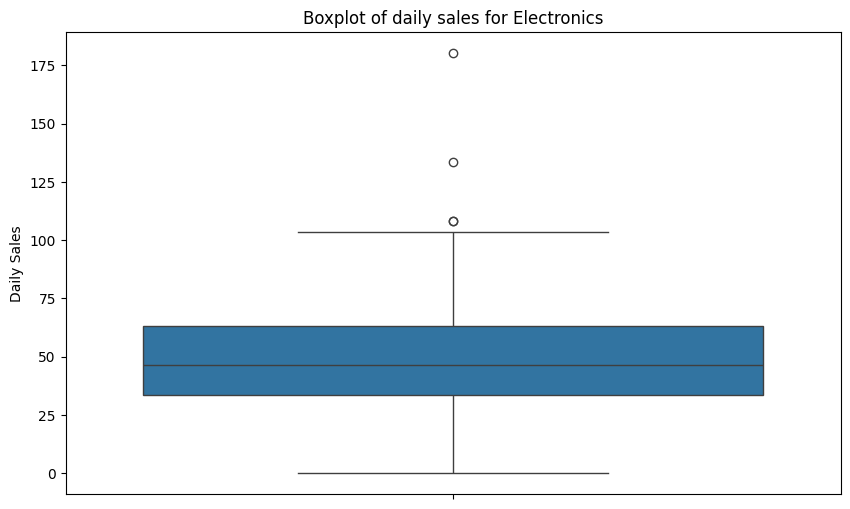

In [18]:
#check  for outliers
plt.figure(figsize=(10,6))
sns.boxplot(y=electronics_df["daily_sales"])
plt.title("Boxplot of daily sales for Electronics")
plt.ylabel("Daily Sales")
plt.show()

In [19]:
# lets not delete the outliers as they can be important for our analysis . we can use robust statistics to handle them
# lets use winsorization to handle the outliers. 
#winsorization is a technique to handle outliers by setting the extreme values to a specified percentile of the data.
# we will set the extreme values to 1% and 99% percentile of the data

In [20]:
# lets apply Winsonrization to the daily_sales column 
from  scipy.stats.mstats import winsorize
electronics_df["daily_sales"]= winsorize(electronics_df["daily_sales"],limits=[0.01,0.01])

C:\Users\anime\AppData\Local\Temp\ipykernel_13208\2978705096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics_df["daily_sales"]= winsorize(electronics_df["daily_sales"],limits=[0.01,0.01])


In [21]:
#aggregate the sales by date  across all the stores
sale_by_date=electronics_df.groupby("date")["daily_sales"].sum().reset_index()

count    288.000000
mean      49.263404
std       22.311990
min        2.421445
25%       33.595843
50%       46.261916
75%       63.099369
max      108.422895
Name: daily_sales, dtype: float64

median: 46.26191634237964


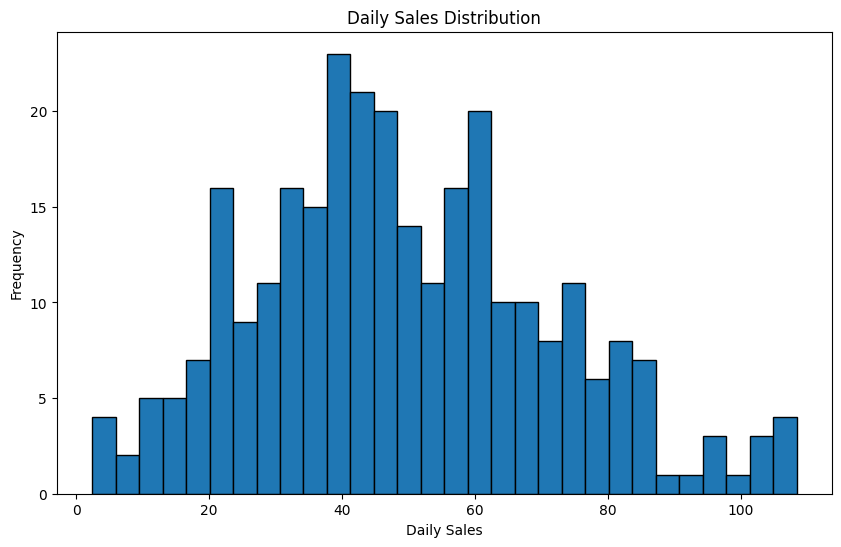

In [22]:
#EDA(exploratory data analysis)
print(sale_by_date["daily_sales"].describe())
print()
print(f"median: {sale_by_date['daily_sales'].median()}")
plt.figure(figsize=(10,6))
plt.hist(sale_by_date["daily_sales"],bins=30,edgecolor='black')
plt.title("Daily Sales Distribution")
plt.xlabel("Daily Sales")
plt.ylabel("Frequency")
plt.show()


In [23]:
#The distribution appears to be somewhat right-skewed, meaning it has a longer tail on the right side. 
# The mean (50.32 from the descriptive stats) is larger than the median (48.25), which is another indication of right-skew.

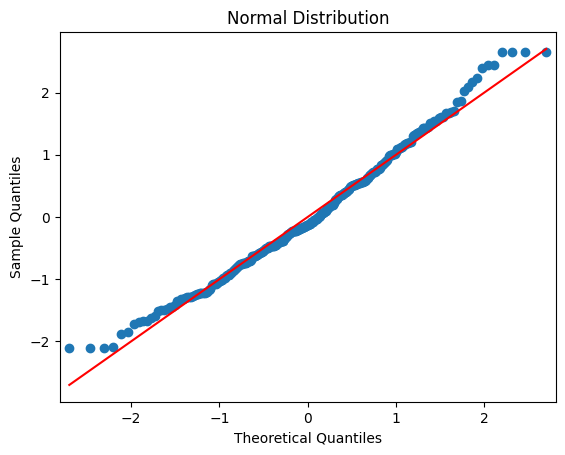

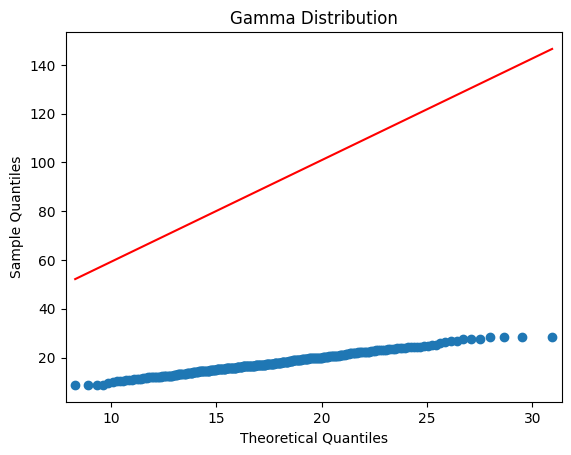

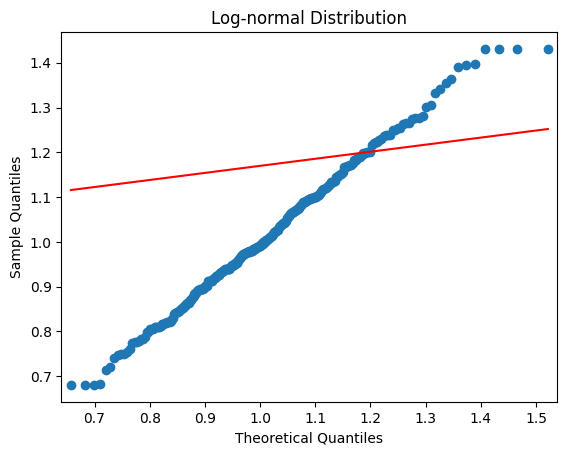

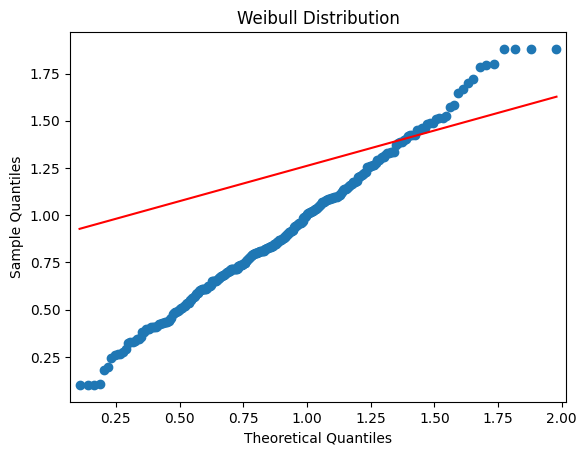

,KS Statistic,P-value,parmas
Distribution,,,
Normal,0.056988,0.295633,"(49.26340424243504, 22.27322065329347)"
Gamma,0.025616,0.989181,"(17.533588398442788, -44.381130453255196, 5.34..."
Log-normal,0.026881,0.981853,"(0.15541838912518613, -93.70774939091314, 141...."
Weibull,0.032074,0.919023,"(2.5402853073520113, -3.6663913575188314, 59.6..."


In [43]:
# probably distribution fitting and goodness of fit test can be used to find the best suitable distribution for the data:
# seeing the best suitable distribution  for my data ie:  (Normal, Gamma, Log-normal, and Weibull )
distribution=[("Normal",stats.norm),
              ("Gamma",stats.gamma),
              ("Log-normal",stats.lognorm),
              ("Weibull",stats.weibull_min)#weibull_min is used as it is a right skewed distribution
]

results=[]

for name, dist in distribution:
    params =dist.fit(sale_by_date['daily_sales']) #fitting the data to the distribution to get the parameters
    # we are using the Kolmogorov-Smirnov test to test the goodness of fit
    ks_stat,p_value=stats.kstest(sale_by_date['daily_sales'],dist.cdf,args=params)
    results.append([name,ks_stat,p_value,params])
    
    #q-q plots the distribution
    fig=sm.qqplot(sale_by_date['daily_sales'],dist=dist,line='s',fit=True)
    plt.title(f'{name} Distribution')
    plt.show()
#convert the results to a dataframe
    
results_df=pd.DataFrame(results,columns=["Distribution","KS Statistic","P-value","parmas"]).set_index("Distribution")
results_df


In [58]:
# as we can see from the results the best fit distribution is Gamma distribution as it has the highest p-value and the lowest KS statistic 
# higher p-value and lower KS statistic indicate a better fit as it fails to reject the null hypothesis.
gamma_params=results_df.iloc[1]["parmas"]
print(f"Shape: {gamma_params[0]}, location: {gamma_params[1]}, scale: {gamma_params[2]}")

Shape: 17.533588398442788, location: -44.381130453255196, scale: 5.340865393136634


In [59]:
gamma_params

(np.float64(17.533588398442788),
 np.float64(-44.381130453255196),
 np.float64(5.340865393136634))

In [70]:
#Probability of the best fit distribution is Gamma distribution with the highest p-value and the lowest KS statistic.
# we can use the gamma distribution to calculate the probability 
from scipy.stats import gamma
#probability of selling less than 50 units in a day
prob_less_than_50 = gamma.cdf(50, *gamma_params)

#probability of selling more than 75 units in a day
prob_more_than_200 = 1 - gamma.cdf(75, *gamma_params)

#probability of selling between 50 and 75 units in a day
prob_between_50_and_75 = gamma.cdf(75, *gamma_params) - gamma.cdf(50, *gamma_params)


#probability densicty at a specific value ( likelihood of exact value)
prob_density_at_60 = gamma.pdf(60, *gamma_params)

print(f"Probability of selling less than 50 units in a day: {prob_less_than_50:.4f}")

print(f"Probability of selling more than 75 units in a day: {prob_more_than_200:.4f}")

print(f"Probability of selling between 50 and 75 units in a day: {prob_between_50_and_75:.4f}")

Probability of selling less than 50 units in a day: 0.5448
Probability of selling more than 75 units in a day: 0.1276
Probability of selling between 50 and 75 units in a day: 0.3276


In [72]:
# probability of selling more than 200 in a day: 
prob_more_than_200=1-gamma.cdf(200,*gamma_params)
print(f"Probability of selling more than 200 units in a day: {prob_more_than_200:.4f}")

Probability of selling more than 200 units in a day: 0.0000


In [73]:
# from histogram we can see that there no sales above 200 units in a day , 
# therefor the probability of selling more than 200 units in a day is 0

In [83]:
#forecasting the sales for the next 30 days
# we can use the gamma distribution to forecast the sales for the next 30 days
last_date_str=sale_by_date["date"].max() #the last date in the dataset
last_date=pd.to_datetime(last_date_str) #convert the last date to datetime

forcasting_days=30

future_dates= [last_date+timedelta(days=i) for i in range(1,forcasting_days+1)] #generate the next 30 days


In [85]:
#generate  random sales sample
forecast_sales=gamma.rvs(*gamma_params,size=forcasting_days)

#convert the sales to dataframe

forecast_df=pd.DataFrame({"date":future_dates, "daily_sales":forecast_sales})

sales_extended=pd.concat([sale_by_date,forecast_df],ignore_index=True)

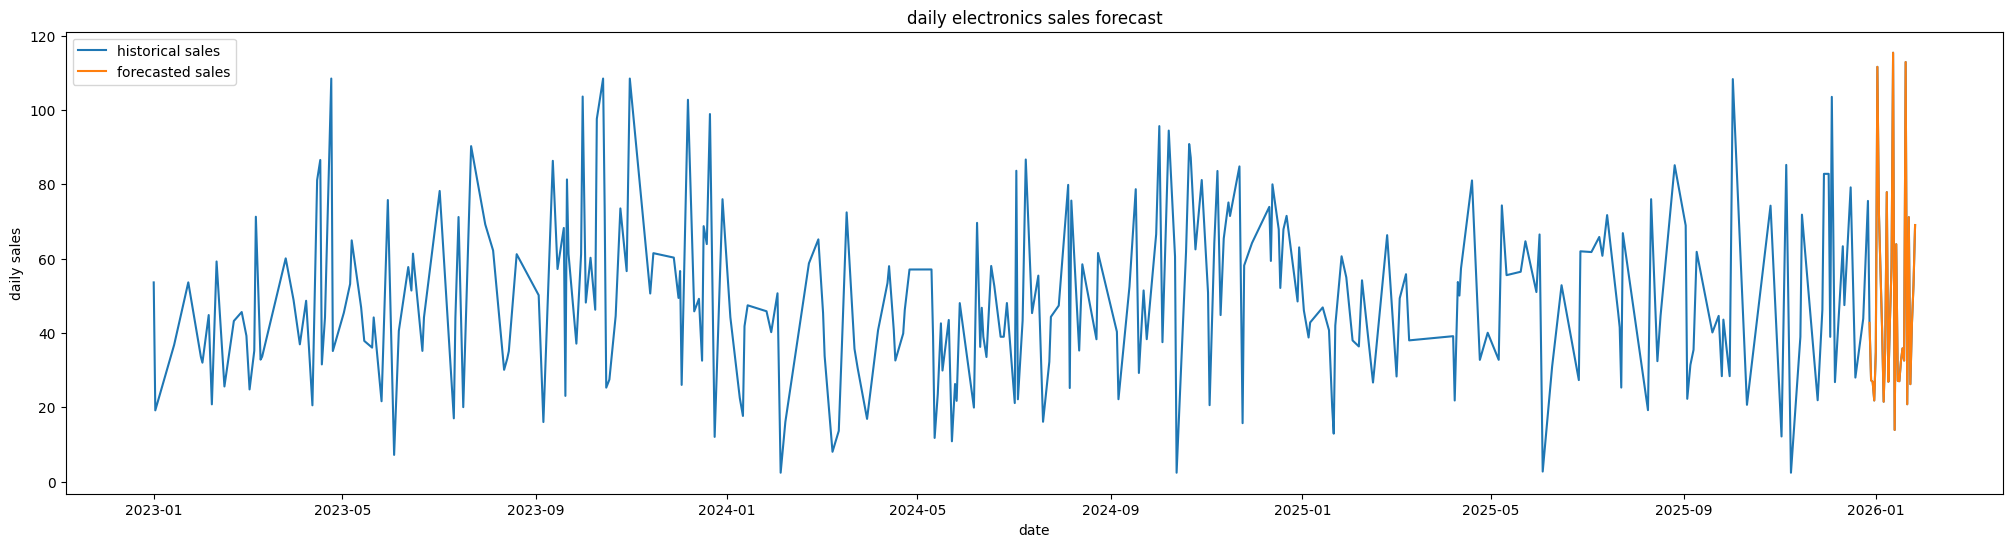

In [95]:
#plot the forecasted sales
plt.figure(figsize=(25,6))
plt.plot(sales_extended["date"],sales_extended["daily_sales"],label="historical sales")
plt.plot(forecast_df["date"],forecast_df["daily_sales"],label="forecasted sales")
plt.title("daily electronics sales forecast")
plt.xlabel("date")
plt.ylabel("daily sales")
plt.legend()

plt.show()


In [ ]:
#done.............................................................................